<a href="https://colab.research.google.com/github/MUHOOZId/MUHOOZId/blob/main/AI_Based_solutions_for_Cyber_defence_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
!pip install matplotlib
!pip install seaborn

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [6]:
# Load the dataset
data = pd.read_csv("LossFromNetCrime.csv")

# Quick look
print(data.head())
print(data.shape)

  Country  2019_Complaints  2019_Losses  2020_Complaints  2020_Losses  2021_Complaints  2021_Losses  2022_Complaints  2022_Losses  2023_Complaints  2023_Losses  2024_Complaints  2024_Losses
0      PR              655      5929974             1338      7209755             1785      9463928             1594     17211758             1817     21018302             1974     31545772
1      PS             1784     22483591             2890     25423219             3352     48918464             3210     57796003             3378     69292891             3811     66002407
2      PT             1119     13870074             2020     12391290             2102     18205913             1918     30859319             2178     28700418             2209     40192274
3      PY             1913     10967865             2992     13815152             3188     26677869             3768     40114594             3487     33579643             2678     45168957
4      AE             5503     48101706           

In [7]:
# Checking basic information
print(data.info())

# Describe statistical summary
print(data.describe())

# Check missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Check unique values of categorical columns (Country)
print(data['Country'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          116 non-null    object
 1   2019_Complaints  117 non-null    int64 
 2   2019_Losses      117 non-null    int64 
 3   2020_Complaints  117 non-null    int64 
 4   2020_Losses      117 non-null    int64 
 5   2021_Complaints  117 non-null    int64 
 6   2021_Losses      117 non-null    int64 
 7   2022_Complaints  117 non-null    int64 
 8   2022_Losses      117 non-null    int64 
 9   2023_Complaints  117 non-null    int64 
 10  2023_Losses      117 non-null    int64 
 11  2024_Complaints  117 non-null    int64 
 12  2024_Losses      117 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 12.0+ KB
None
       2019_Complaints   2019_Losses  2020_Complaints   2020_Losses  2021_Complaints   2021_Losses  2022_Complaints   2022_Losses  2023_Complaints   2023_Losses  2

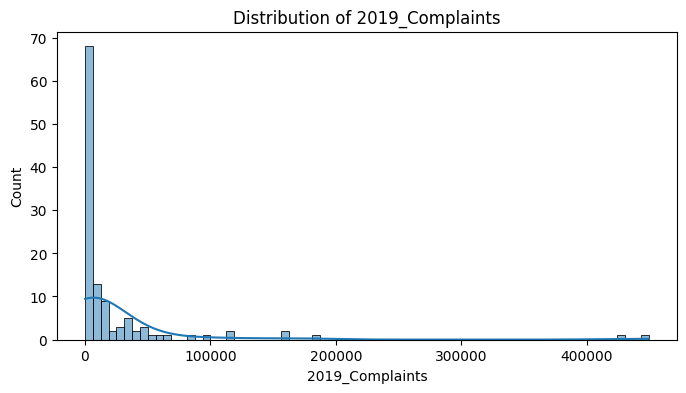

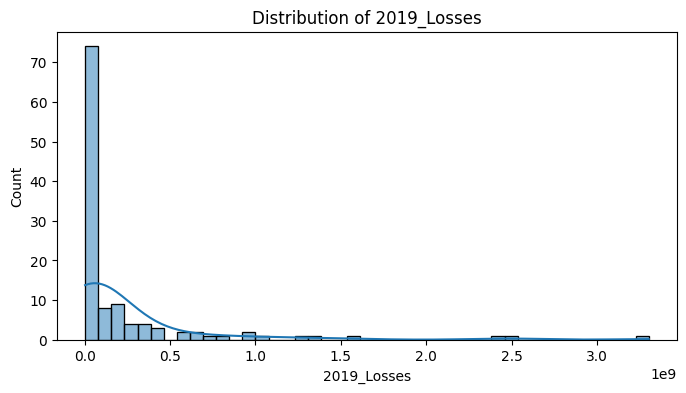

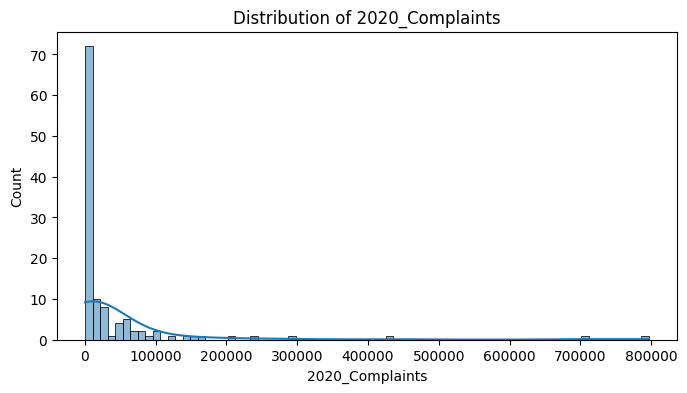

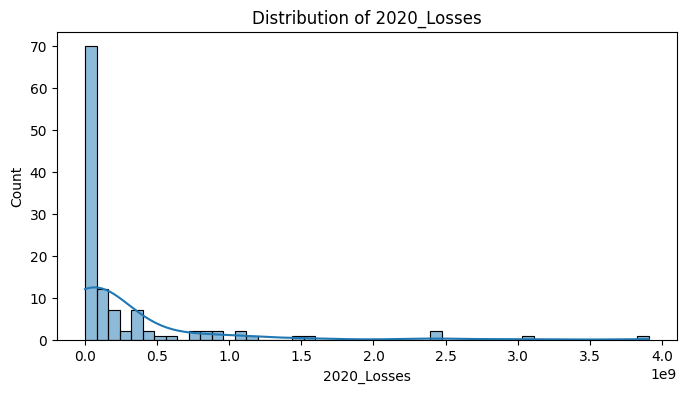

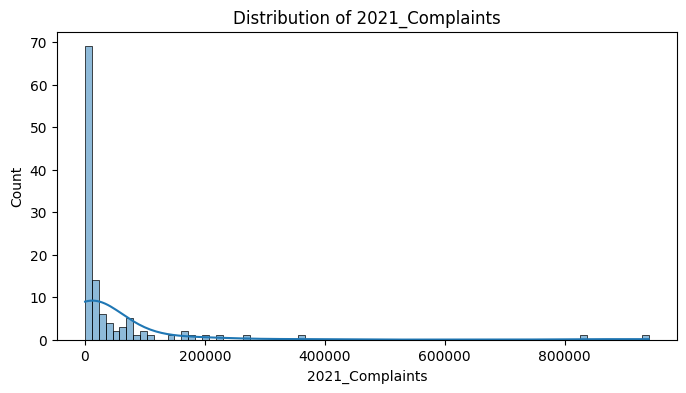

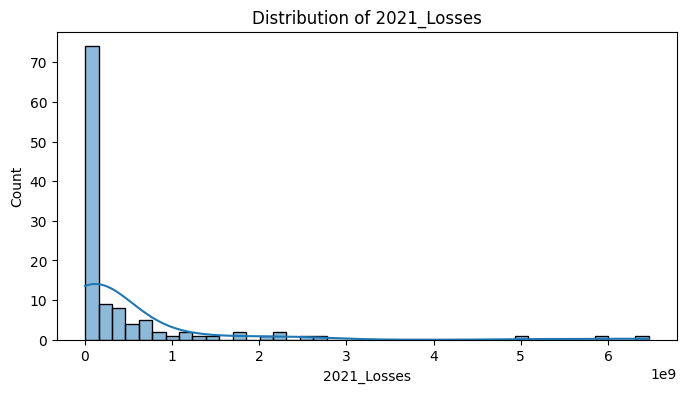

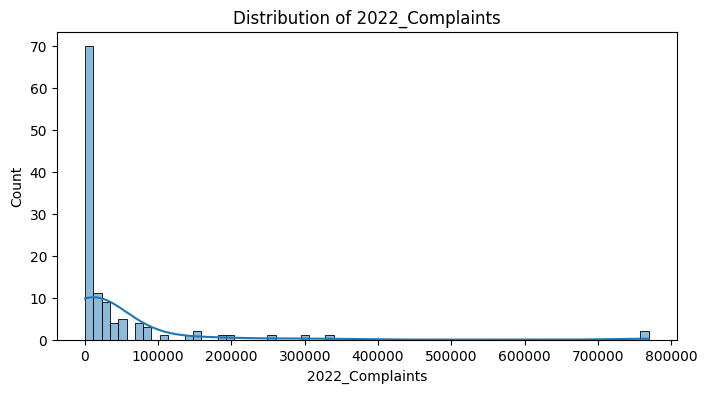

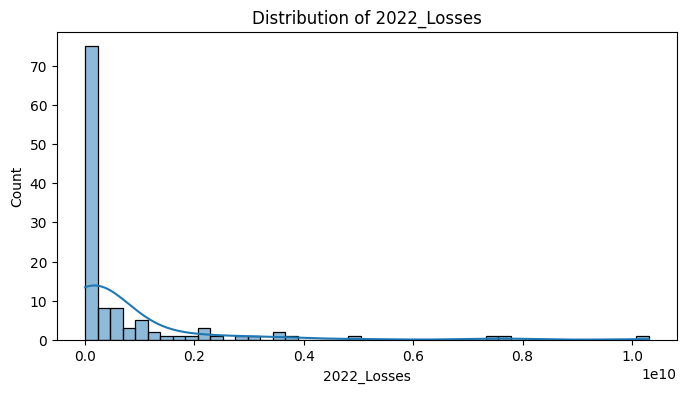

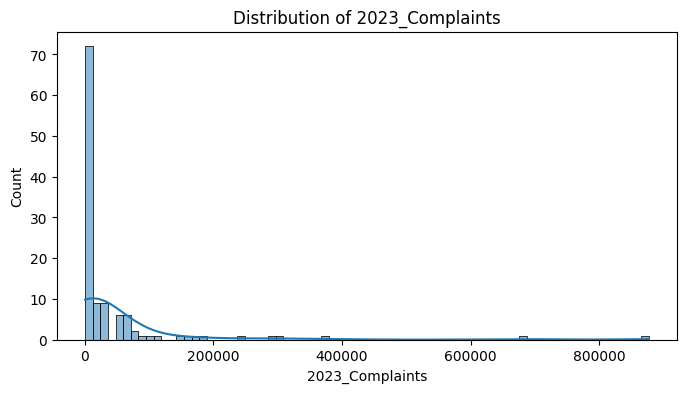

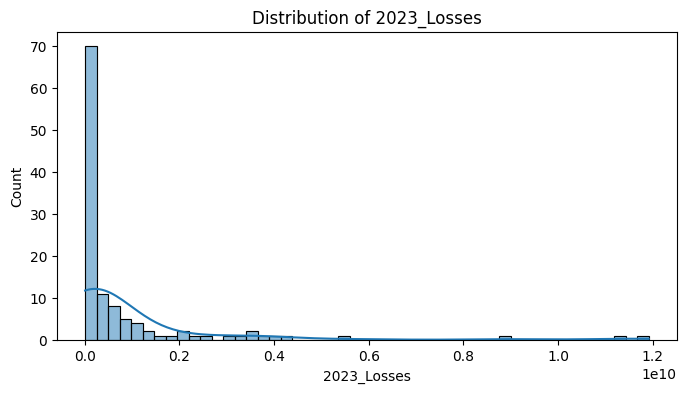

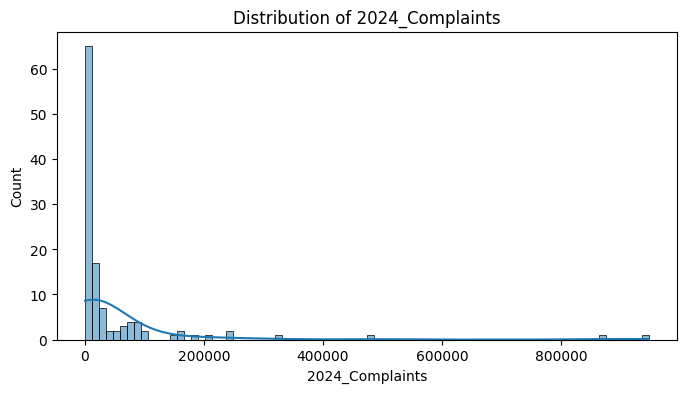

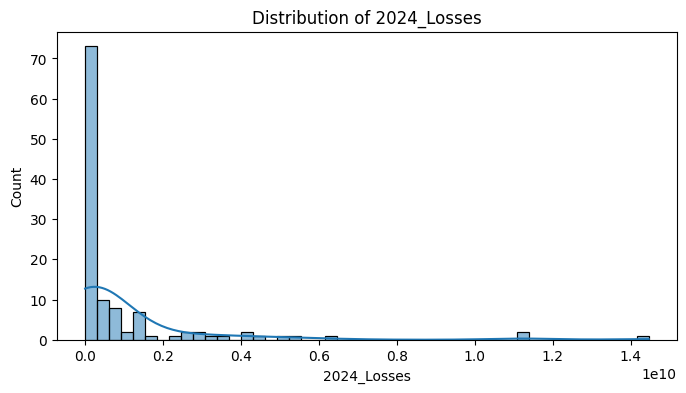

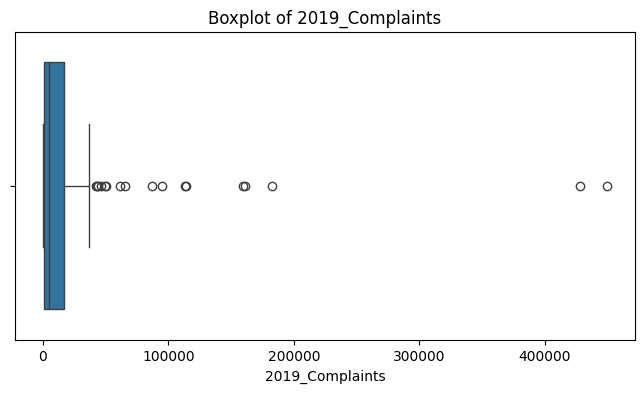

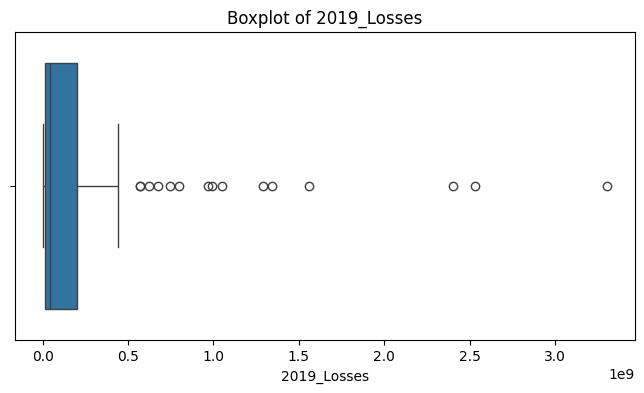

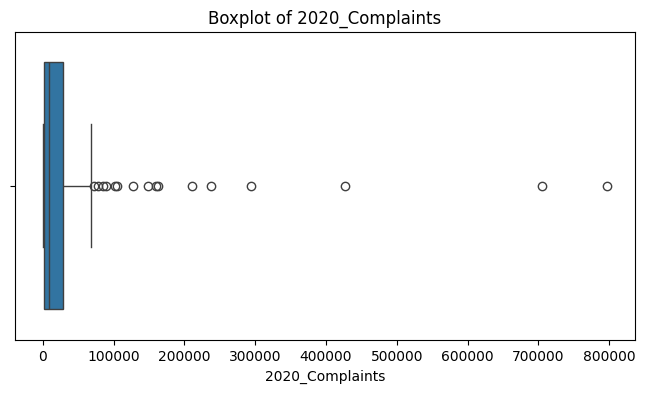

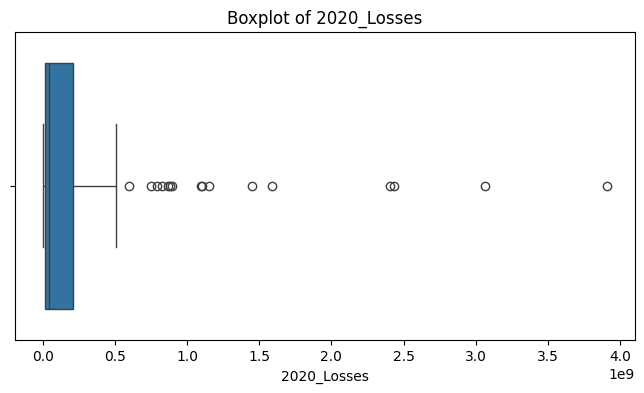

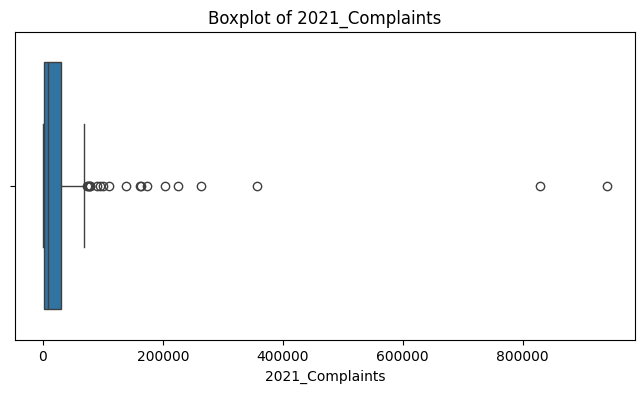

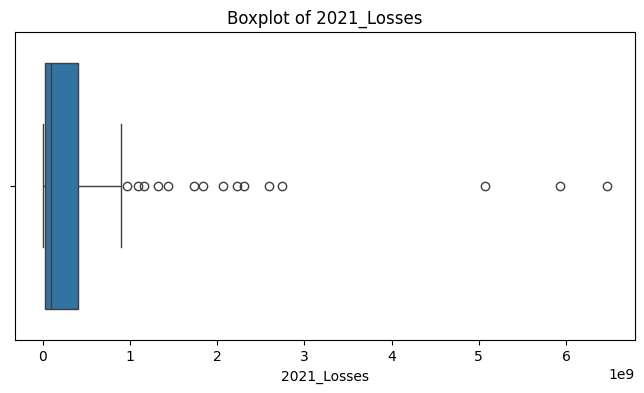

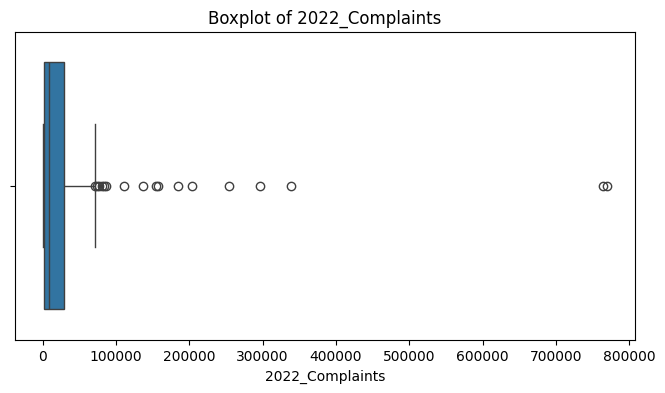

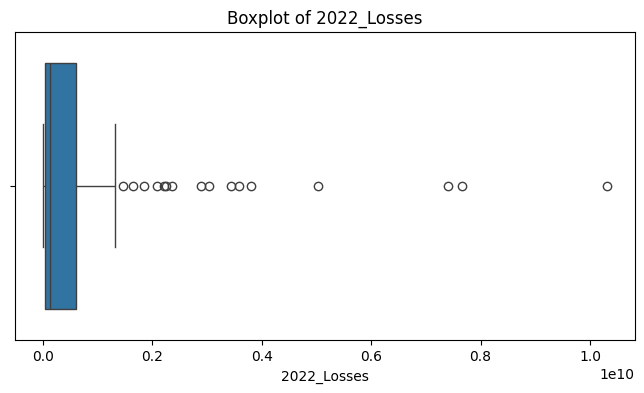

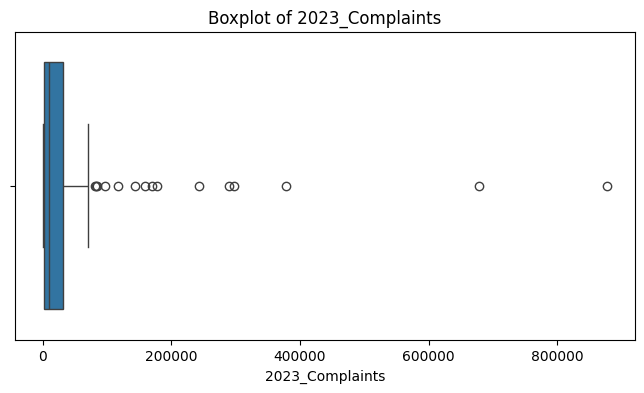

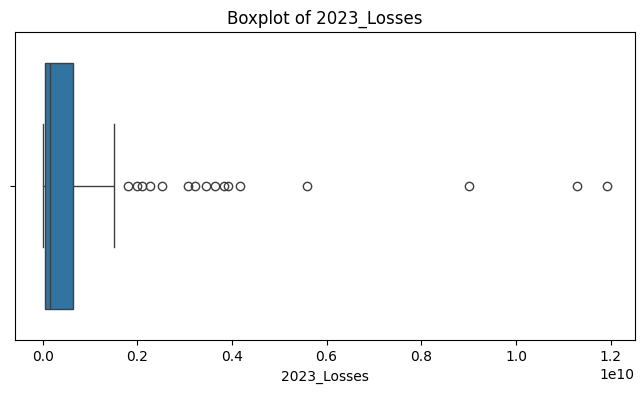

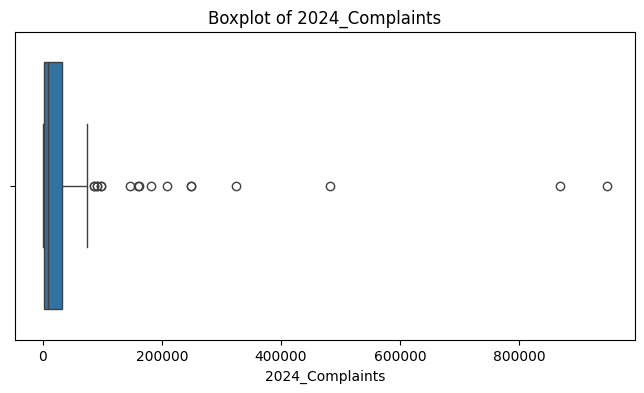

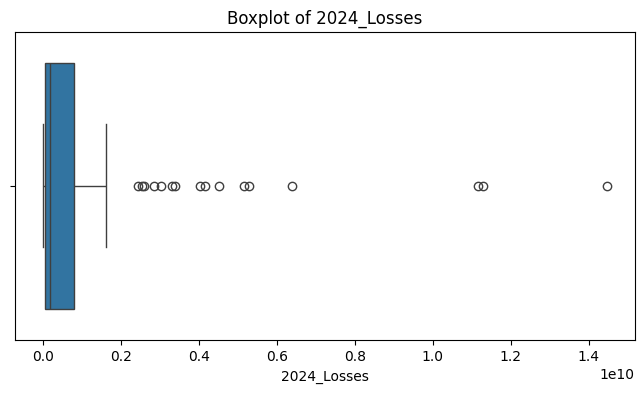

In [8]:
# Visualizing numerical columns distribution
numeric_cols = data.columns[1:]

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots to identify outliers
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [9]:
# (If missing values found, apply imputation. Example below:)
data.fillna(data.median(numeric_only=True), inplace=True)

# Handling outliers - Example: clipping to 99th percentile
for col in numeric_cols:
    upper_limit = data[col].quantile(0.99)
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

# Normalize or Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print(data.head())


  Country  2019_Complaints  2019_Losses  2020_Complaints  2020_Losses  2021_Complaints  2021_Losses  2022_Complaints  2022_Losses  2023_Complaints  2023_Losses  2024_Complaints  2024_Losses
0      PR        -0.397325    -0.477481        -0.394874    -0.479235        -0.379757    -0.454755        -0.386898    -0.474561        -0.413787    -0.446367        -0.386090    -0.461759
1      PS        -0.377944    -0.442159        -0.379694    -0.446300        -0.365490    -0.415311        -0.371339    -0.446199        -0.398098    -0.420289        -0.371010    -0.445099
2      PT        -0.389360    -0.460539        -0.388203    -0.469865        -0.376871    -0.446015        -0.383778    -0.465023        -0.410159    -0.442217        -0.384161    -0.457578
3      PY        -0.375729    -0.466731        -0.378697    -0.467290        -0.366983    -0.437546        -0.365967    -0.458555        -0.397003    -0.439581        -0.380311    -0.455172
4      AE        -0.314100    -0.387496        -0.

In [11]:
# Defining features and target
X = data.drop(['Country', '2024_Losses'], axis=1)
y = data['2024_Losses']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

RMSE: 0.09198723171983778
R² Score: 0.9672186263629547


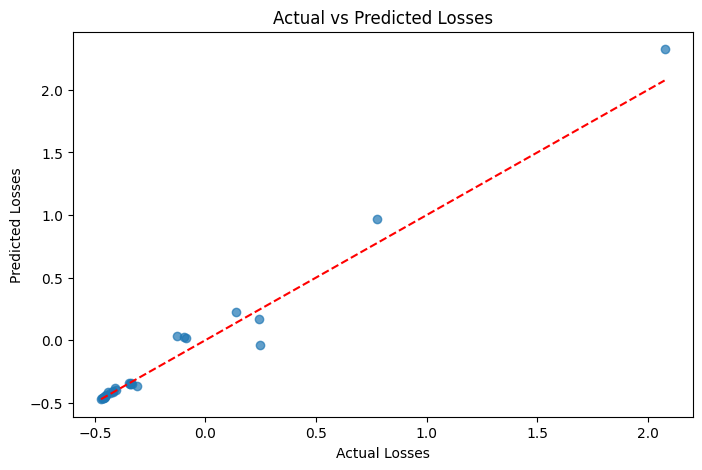

In [14]:
# Performance evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Visualizing actual vs predicted values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Losses")
plt.ylabel("Predicted Losses")
plt.title("Actual vs Predicted Losses")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal prediction line
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
   # rmse = mean_squared_error(y_test, preds, squared=False)
    rmse = np.sqrt(mean_squared_error(y_test, preds)) # Remove squared=False, calculate RMSE using np.sqrt
    r2 = r2_score(y_test, preds)
    print(f"{name} - RMSE: {rmse}, R²: {r2}")


Linear Regression - RMSE: 0.09681347012897973, R²: 0.9636885473579007
Gradient Boosting - RMSE: 0.14636936038958742, R²: 0.9170010880250486
